# Proyek Analisis Data: E-Commerce Public
- **Nama:** Paul David Djukardi
- **Email:** pauldaviddjukardi@gmail.com
- **ID Dicoding:** [MS082D5Y0638]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Dimana kota lokasi tren pembelian tertinggi dan terendah berada ?
- Pertanyaan 2: Metode pembayaran yang dominan dipakai oleh klien ? dan apakah ada relevansi dengan besaran nilai pembayaran ?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


# Data Wrangling

### Gathering Data

In [4]:
#drive
dataset_direktori = '/content/drive/MyDrive/7 Oktober/dataset'

# Mengambil data csv
df_customer = pd.read_csv(f"{dataset_direktori}/customers_dataset.csv")
df_geolocation = pd.read_csv(f"{dataset_direktori}/geolocation_dataset.csv")
df_items = pd.read_csv(f"{dataset_direktori}/order_items_dataset.csv")
df_payments = pd.read_csv(f"{dataset_direktori}/order_payments_dataset.csv")
df_reviews = pd.read_csv(f"{dataset_direktori}/order_reviews_dataset.csv")
df_orders = pd.read_csv(f"{dataset_direktori}/orders_dataset.csv")
df_products = pd.read_csv(f"{dataset_direktori}/products_dataset.csv")
df_sellers = pd.read_csv(f"{dataset_direktori}/sellers_dataset.csv")
df_category = pd.read_csv(f"{dataset_direktori}/product_category_name_translation.csv")
# simpan dalam satu dictionary
datasets = {
    'customers': df_customer,
    'geolocation': df_geolocation,
    'order_items': df_items,
    'order_payments': df_payments,
    'order_reviews': df_reviews,
    'orders': df_orders,
    'products': df_products,
    'sellers': df_sellers,
    'category': df_category
}

# Akses data head
def akses_datahead(datasets):
  for akses, df in datasets.items():
     print(f"--- Head dataset '{akses}' ---")
     print(df.head())
     print("\n")

akses_datahead(datasets)

--- Head dataset 'customers' ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


--- Head dataset 'geolocation' ---
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0              

### Assessing Data

In [5]:
# Menilai seluruh data
def menilai_seluruh_data(datasets):
  for akses, df in datasets.items():
    print(f"--- Penilaian dataset '{akses}' ---")
    df.info()
    print("\n")
    print(f"--- Statistik dasar {akses} --- ")
    print(f"Jumlah baris: {df.shape[0]}")
    print(f"Jumlah kolom: {df.shape[1]}")
    print(f"Jumlah data yang hilang:")
    print(df.isnull().sum())
    print(f"Jumlah data duplikat: {df.duplicated().sum()}\n")
    print(f"--- Deskripsi data ---{akses}")
    print(df.describe())
    print("\n")

print(menilai_seluruh_data(datasets))

--- Penilaian dataset 'customers' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


--- Statistik dasar customers --- 
Jumlah baris: 99441
Jumlah kolom: 5
Jumlah data yang hilang:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah data duplikat: 0

--- Deskripsi data ---customers
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std         

# Pilah data yang rusak

In [6]:
def mengenalidatarusak(datasets):
    data_rusak_ditemukan = False

    for akses, df in datasets.items():
        jumlah_hilang = df.isnull().sum().sum()
        jumlah_duplikat = df.duplicated().sum()

        if jumlah_hilang > 0 or jumlah_duplikat > 0:
            data_rusak_ditemukan = True
            print(f"\n=== Dataset '{akses}' memiliki data rusak ===")
            if jumlah_hilang > 0:
                print(f"- Data hilang: {jumlah_hilang} nilai hilang. \n")
                print(f"\n Kolom-kolom yang hilang:")
                print(df.columns[df.isnull().any()])

            if jumlah_duplikat > 0:
                print(f"- \nData duplikat: {jumlah_duplikat} baris duplikat.\n")
                print(f"  Contoh data duplikat:\n")
                print(df[df.duplicated(keep=False)].head())
        else:
            print(f"\nDataset '{akses}' tidak memiliki data rusak.\n")

print(mengenalidatarusak(datasets))


Dataset 'customers' tidak memiliki data rusak.


=== Dataset 'geolocation' memiliki data rusak ===
- 
Data duplikat: 261831 baris duplikat.

  Contoh data duplikat:

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
6                         1047       -23.546273       -46.641225   
7                         1013       -23.546923       -46.634264   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
6        sao paulo                SP  
7        sao paulo                SP  

Dataset 'order_items' tidak memiliki data rusak.


Dataset 'order_payments' tidak memiliki data rusak.


=== Dataset 'order_reviews' memiliki data rusak ===
- Data hilang: 145903 nilai hila

# Insight | Data Broken in


1.   geolocation
2.   order_reviews
3.   orderan
4.   product



# Cleaning Data

1. Data Geolokasi

In [7]:
# Membersihkan Data Geo Lokasi

# data sebelum dibersihkan
def datakotorgeo(datasets):
  df = datasets.get('geolocation')
  print(f"Jumlah data yang duplikat sebelum dibersihkan: {df.duplicated().sum()}\n")
  print("\n === Data Geo Lokasi Sebelum Dibersihkan ===")
  df.info()
  print(df.head())
  print(df.describe())

print(datakotorgeo(datasets))

Jumlah data yang duplikat sebelum dibersihkan: 261831


 === Data Geo Lokasi Sebelum Dibersihkan ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041  

In [8]:
# proses pembersihan

df_geolocation.drop_duplicates(inplace=True)

# data sesudah dibersihkan
def datakotorgeo(datasets):
  df = datasets.get('geolocation')
  print(f"Jumlah data yang duplikat setelah dibersihkan: {df.duplicated().sum()}\n")
  print("\n === Data Geo Lokasi Setelah Dibersihkan ===")
  df.info()
  print(df.head())
  print(df.describe())

print(datakotorgeo(datasets))

Jumlah data yang duplikat setelah dibersihkan: 0


 === Data Geo Lokasi Setelah Dibersihkan ===
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392   

# Insight


1.   Data Duplicated Before Cleaning = 261831
2.   Data Missing Before Cleaning = 0

After Cleaning =


1.   Data Duplicated After Cleaning = 0
2.   Data Missing After Cleaning = 0




2. Order Reviews

In [9]:
# Data Kotor Order Reviews

def datakotorreviews(datasets):
  df = datasets.get('order_reviews')
  print(f"Jumlah data yang hilang sebelum dibersihkan: {df.isna().sum()}\n")
  print("\n === Data Geo Lokasi Sebelum Dibersihkan ===")
  df.info()
  print(df.head())
  print(df.describe())

print(datakotorreviews(datasets))

Jumlah data yang hilang sebelum dibersihkan: review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


 === Data Geo Lokasi Sebelum Dibersihkan ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
                          rev

In [10]:
# Proses Pembersihan Comment title
df_reviews[df_reviews.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [11]:
# Cek jumlah data
df_reviews.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [12]:
# Kita bakal isi data yang hilang dengan string "No comment title"

df_reviews.review_comment_title.fillna("No Comment Title", inplace=True)

# Cek data count ulang
print(df_reviews.review_comment_title.value_counts())
print("")
# Crosscheck data
print(df_reviews.isna().sum())

review_comment_title
No Comment Title             87656
Recomendo                      423
recomendo                      345
Bom                            293
super recomendo                270
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: count, Length: 4528, dtype: int64

review_id                      0
order_id                       0
review_score                   0
review_comment_title           0
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


<ipython-input-12-5d3c1509a278>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews.review_comment_title.fillna("No Comment Title", inplace=True)


In [13]:
# membersihkan data message
df_reviews[df_reviews.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment Title,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment Title,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment Title,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment Title,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,No Comment Title,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,No Comment Title,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,No Comment Title,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Comment Title,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Comment Title,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [14]:
# Cek jumlah message
df_reviews.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [15]:
# Kita bakal isi data yang hilang dengan string "No Comment message"
df_reviews.review_comment_message.fillna("No Comment Message", inplace=True)

# kita cek ulang
print(df_reviews.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


<ipython-input-15-81ba70f2ac92>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews.review_comment_message.fillna("No Comment Message", inplace=True)


# Insight
Data Missing Before Cleaning =

1. review_comment_title       87656
2. review_comment_message     58247

Data Duplicated Before Cleaning = 0

After Cleaning =
1. Data Missing After Cleaning = 0
2. Data Duplicated After Cleaning = 0


3. Orderan

In [16]:
# Data kotor orderan
def datakotororder(datasets):
  df = datasets.get('orders')
  print(f"Jumlah data yang hilang sebelum dibersihkan: {df.isna().sum()}\n")
  print("\n === Data Geo Lokasi Sebelum Dibersihkan ===")
  df.info()
  print(df.head())
  print(df.describe())

print(datakotororder(datasets))

Jumlah data yang hilang sebelum dibersihkan: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


 === Data Geo Lokasi Sebelum Dibersihkan ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_

In [17]:
# Proses Pembersihan data Order
df_orders[df_orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [31]:
# Data NaN karena orderan di cancelled maka seluruh data NaN akan kita cancelled juga
def mengisi_data_order(df_orders):
  df = df_orders
  df.order_approved_at.fillna("Cancelled", inplace=True)
  df.order_delivered_carrier_date.fillna("Cancelled", inplace=True)
  df.order_delivered_customer_date.fillna("Cancelled", inplace=True)
  return df

df_orders = mengisi_data_order(df_orders)
print(df_orders.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


# Insight
Data Missing Before Cleaning
1. order_approved_at =                160
2. order_delivered_carrier_date  =   1783
3. order_delivered_customer_date  =  2965

Data Duplicated Before Cleaning = 0

After Cleaning
1. Data Missing After Cleaning = 0
2. Data Duplicated After Cleaning = 0

4. Product

In [19]:
def datakotorproduct(datasets):
  df = datasets.get('products')
  print(f"Jumlah data yang hilang sebelum dibersihkan: {df.isna().sum()}\n")
  print("\n === Data Produk Sebelum Dibersihkan ===")
  df.info()
  print(df.head())
  print(df.describe())

print(datakotorproduct(datasets))

Jumlah data yang hilang sebelum dibersihkan: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


 === Data Produk Sebelum Dibersihkan ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm       

In [20]:
#Proses pembersihan


# Cek data yang hilang
df_products[df_products.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [21]:
# Cek data dengan jumlah value missing yang sama
print(df_products[df_products.product_category_name.isna()])
print()
print(df_products[df_products.product_description_lenght.isna()])
print()
print(df_products[df_products.product_photos_qty.isna()])
print()
print(df_products[df_products.product_name_lenght.isna()])

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [32]:
# Proses Pembersihan
# Isi data product category dengan data modus
df_products['product_category_name'].fillna(df_products['product_category_name'].mode()[0], inplace=True)

# isi data name lenght, description lenght, photos (untuk mengurangi outlier dibandingkan memakai mean)
df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].median(), inplace=True)
df_products['product_description_lenght'].fillna(df_products['product_description_lenght'].median(), inplace=True)
df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].median(), inplace=True)

<ipython-input-32-04757eae2283>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].median(), inplace=True)
<ipython-input-32-04757eae2283>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [33]:
# Cek data ulang
print(df_products.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [34]:
# isi data ukuran yang hilang dengan 0
df_products['product_weight_g'].fillna(0, inplace=True)
df_products['product_length_cm'].fillna(0, inplace=True)
df_products['product_height_cm'].fillna(0, inplace=True)
df_products['product_width_cm'].fillna(0, inplace=True)

<ipython-input-34-b75cd6e9561e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_weight_g'].fillna(0, inplace=True)
<ipython-input-34-b75cd6e9561e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [25]:
df_products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#Insight

Data Missing Before Cleaning
1. product_category_name         610
2. product_name_lenght           610
3. product_description_lenght    610
4. product_photos_qty            610
5. product_weight_g                2
6. product_length_cm               2
7. product_height_cm               2
8. product_width_cm                2

Data Duplicated Before Cleaning = 0

After Cleaning
Data Missing = 0
Data Duplicated = 0

# Exploratory Data Analysis (EDA)

#Explore
1.  Dimana kota lokasi tren pembelian tertinggi dan terendah berada ?

Data Merge

In [26]:
# Gabungkan data order dan customer untuk mendapatkan lokasi pelanggan
df_orders_dan_customer = pd.merge(df_orders, df_customer, on='customer_id')

# Gabungkan lagi dengan data order items untuk mengetahui besar nilai transaksi
data_gabungan_final = pd.merge(df_orders_dan_customer, df_items, on='order_id')

Data Analysis

In [36]:
# Hitung total transaksi per kota
total_transaksi_per_kota = data_gabungan_final.groupby('customer_city', as_index=False)['price'].sum()

# Urutkan kota berdasarkan jumlah transaksi dari terbesar ke terkecil dan terkecil ke terbesar
top_kota = total_transaksi_per_kota.sort_values(by='price', ascending=False).head(10)
bottom_kota = total_transaksi_per_kota.sort_values(by='price', ascending=True).head(10)

# Hitung jumlah transaksi per kota
jumlah_transaksi_per_kota = data_gabungan_final['customer_city'].value_counts().reset_index()
jumlah_transaksi_per_kota.columns = ['customer_city', 'total_transaksi']

#Cetak output
print(top_kota)
print("")
print(bottom_kota)
print("")
print(jumlah_transaksi_per_kota)

       customer_city       price
3588       sao paulo  1914924.54
3147  rio de janeiro   992538.86
452   belo horizonte   355611.13
557         brasilia   301920.25
1141        curitiba   211738.06
2956    porto alegre   190562.08
705         campinas   187844.53
3239        salvador   181104.42
1526       guarulhos   144268.39
2455         niteroi   117907.12

                     customer_city  price
2920  polo petroquimico de triunfo   5.60
3213                      sabaudia   5.90
3395   santo antonio do rio abaixo   6.00
3666         senador jose porfirio   6.00
1953             jenipapo de minas   7.48
1267                 erico cardoso   8.09
2285                  medicilandia   8.99
3784                      tamboara   8.99
504            bom jardim de goias  10.00
2903          planaltina do parana  10.75

       customer_city  total_transaksi
0          sao paulo            17808
1     rio de janeiro             7837
2     belo horizonte             3144
3           brasilia 

Data Visualisation

<ipython-input-28-087d1d69294e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='customer_city', data=top_kota, palette='viridis', order=top_kota['customer_city'])


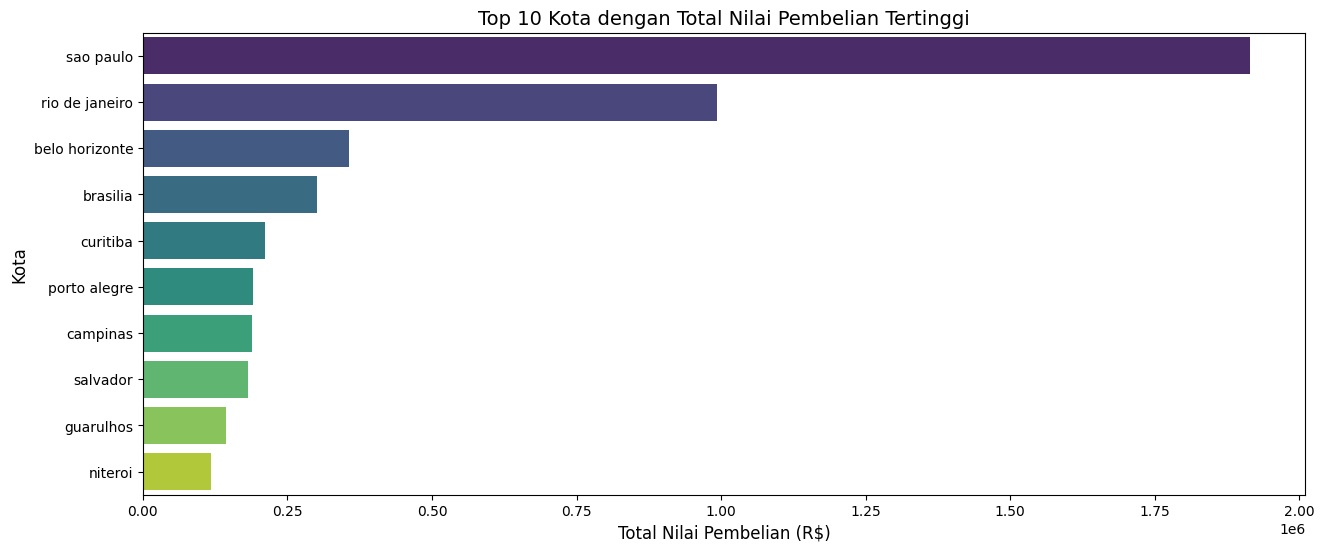

None


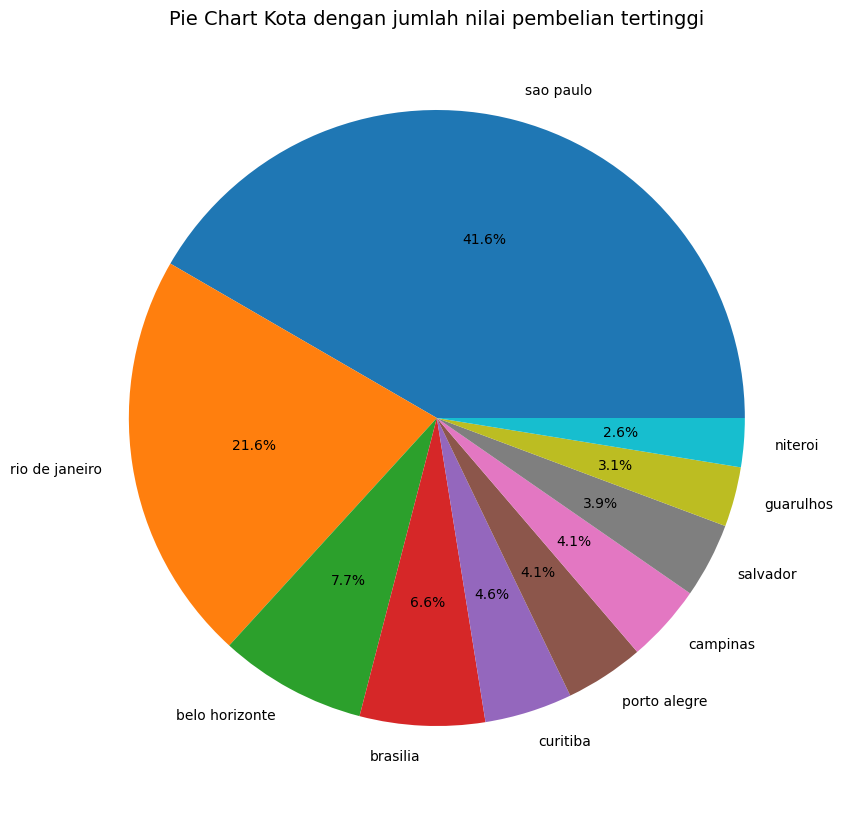

None


<ipython-input-28-087d1d69294e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='customer_city', data=bottom_kota, palette='viridis', order=bottom_kota['customer_city'])


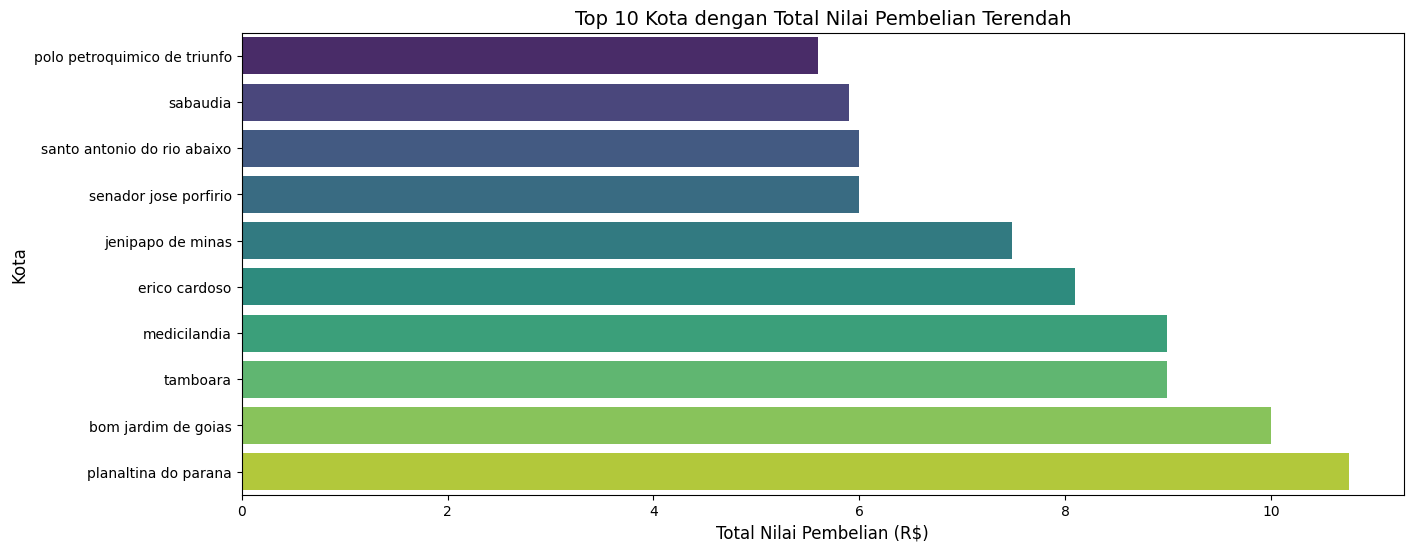

None


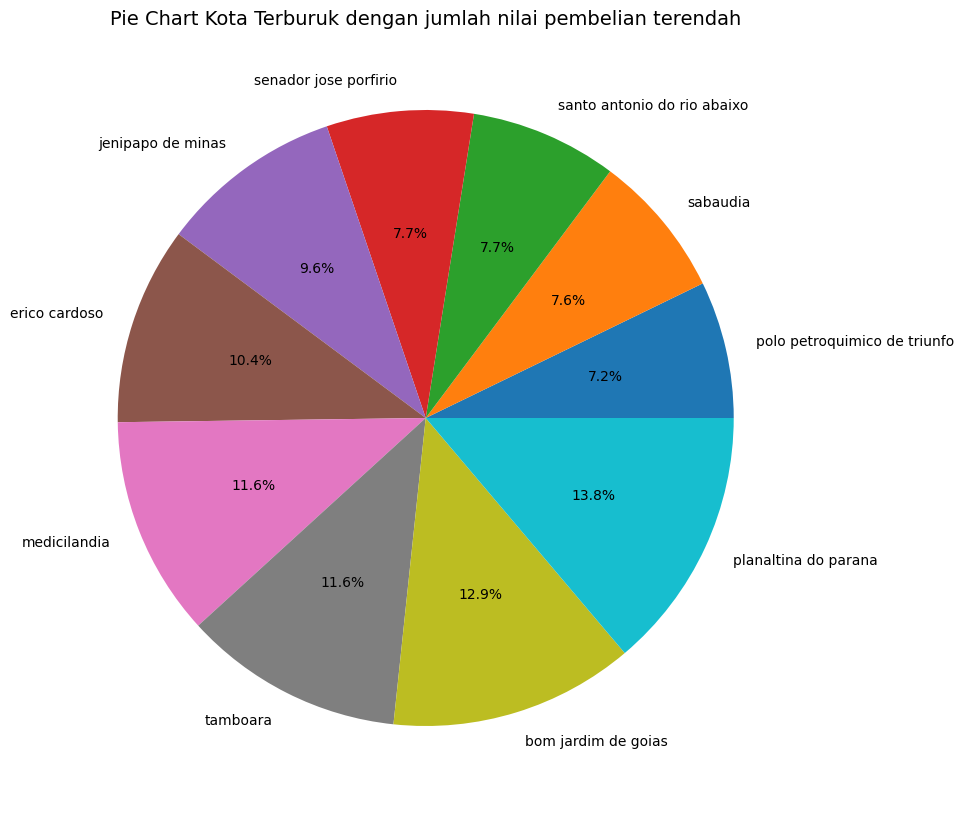

None


In [28]:
#tertinggi dan terendah
def Kota_terbaik(top_kota):
  plt.figure(figsize=(15, 6))
  sns.barplot(x='price', y='customer_city', data=top_kota, palette='viridis', order=top_kota['customer_city'])
  plt.title('Top 10 Kota dengan Total Nilai Pembelian Tertinggi', fontsize=14)
  plt.xlabel('Total Nilai Pembelian (R$)', fontsize=12)
  plt.ylabel('Kota', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.show()

print(Kota_terbaik(top_kota))

def pie_kota_terbaik(top_kota):
  plt.figure(figsize=(10, 10))
  plt.pie(top_kota['price'], labels=top_kota['customer_city'], autopct='%1.1f%%')
  plt.title('Pie Chart Kota dengan jumlah nilai pembelian tertinggi', fontsize=14)
  plt.show()

print(pie_kota_terbaik(top_kota))
#Terendah ke tertinggi
def Kota_terburuk(bottom_kota):
  plt.figure(figsize=(15, 6))
  sns.barplot(x='price', y='customer_city', data=bottom_kota, palette='viridis', order=bottom_kota['customer_city'])
  plt.title('Top 10 Kota dengan Total Nilai Pembelian Terendah', fontsize=14)
  plt.xlabel('Total Nilai Pembelian (R$)', fontsize=12)
  plt.ylabel('Kota', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.show()
print(Kota_terburuk(bottom_kota))

def pie_kota_terburuk(bottom_kota):
  plt.figure(figsize=(10, 10))
  plt.pie(bottom_kota['price'], labels=bottom_kota['customer_city'], autopct='%1.1f%%')
  plt.title('Pie Chart Kota Terburuk dengan jumlah nilai pembelian terendah', fontsize=14)
  plt.show()
print(pie_kota_terburuk(bottom_kota))

2. Metode pembayaran yang dominan dipakai oleh klien ? dan apakah ada relevansi dengan besaran nilai pembayaran ?

#Data Analysis


In [29]:

# hitung jumlah penggunaan metode pembayaran
frekuensi_metode_pembayaran = df_payments['payment_type'].value_counts()
print(frekuensi_metode_pembayaran)

# pengabungan data metode pembayaran dengan besaran jumlah transaksi
mean_metode_dan_jumlah = df_payments.groupby('payment_type', as_index=False)['payment_value'].mean()
print(mean_metode_dan_jumlah)


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64
  payment_type  payment_value
0       boleto     145.034435
1  credit_card     163.319021
2   debit_card     142.570170
3  not_defined       0.000000
4      voucher      65.703354


# Insight

# Metode Pembayaran
1. credit_card: Digunakan pada 76.795 transaksi (metode paling dominan).
2. boleto: Digunakan pada 19.784 transaksi.
3. voucher: Digunakan pada 5.775 transaksi.
4. debit_card: Digunakan pada 1.529 transaksi.
5. not_defined: Hanya terdapat 3 transaksi yang tidak terdefinisi.

# Relevansi
1. credit_card Rata-rata nilai pembayaran sebesar 163.32 R
2. boleto Rata-rata nilai pembayaran sebesar 145.03 R
3. debit_card Rata-rata nilai pembayaran sebesar 142.57 R
4. voucher Rata-rata nilai pembayaran sebesar 65.70 R
5. not_defined Rata-rata nilai pembayaran 0 R$ karena hnya 3 transaksi yang tidak terdefinisi.


# Data Visualisation

<ipython-input-30-3b5c82fac9d7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frekuensi_metode_pembayaran.index, y=frekuensi_metode_pembayaran.values, palette='viridis')


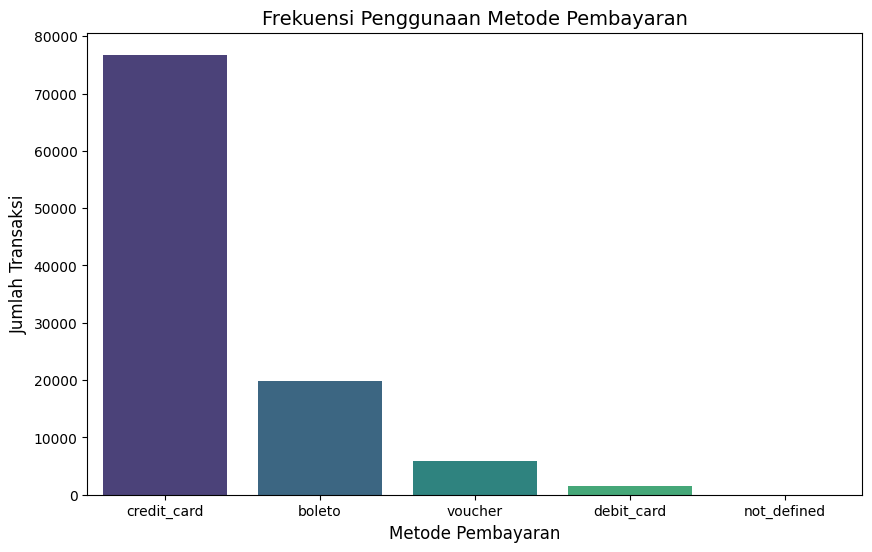

None


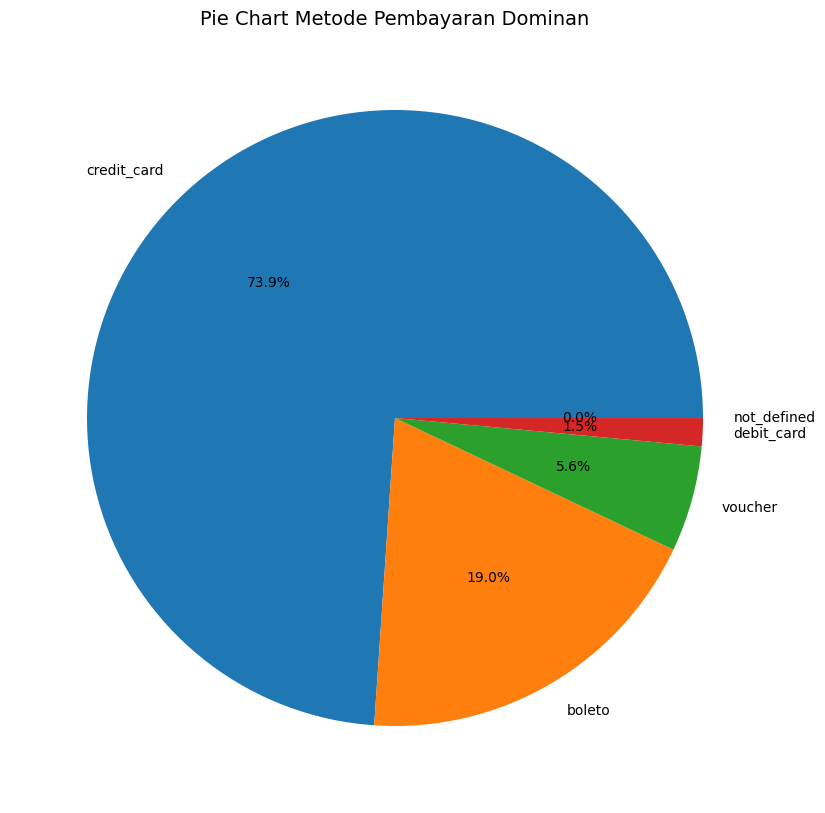

None
None


<ipython-input-30-3b5c82fac9d7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='payment_value', data=mean_metode_dan_jumlah, palette='viridis')


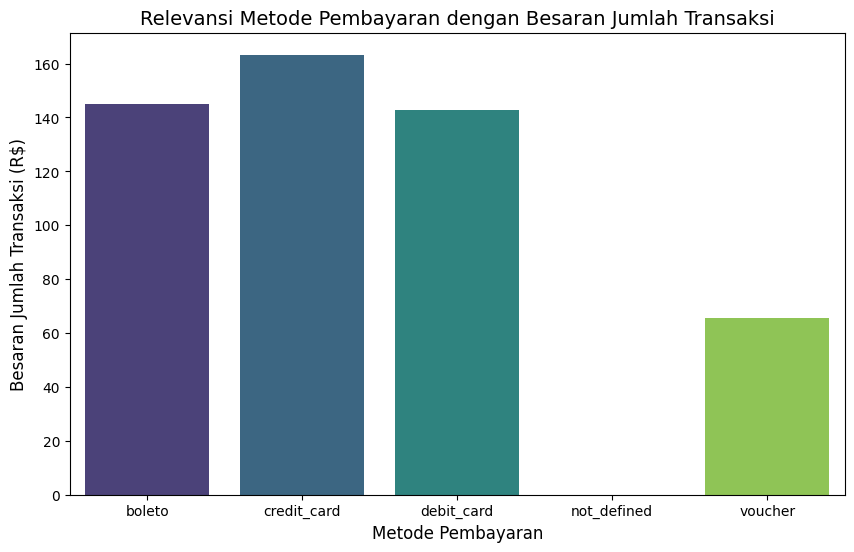

In [30]:
# Metode Pembayaran yang dominan
def metode_pembayaran_dominan(frekuensi_metode_pembayaran):
  plt.figure(figsize=(10,6))
  sns.barplot(x=frekuensi_metode_pembayaran.index, y=frekuensi_metode_pembayaran.values, palette='viridis')
  plt.title("Frekuensi Penggunaan Metode Pembayaran", fontsize=14)
  plt.xlabel("Metode Pembayaran", fontsize=12)
  plt.ylabel("Jumlah Transaksi", fontsize=12)
  plt.show()

def metode_pembayaran_dominan_pie(frekuensi_metode_pembayaran):
  plt.figure(figsize=(10,10))
  plt.pie(frekuensi_metode_pembayaran.values, labels=frekuensi_metode_pembayaran.index, autopct='%1.1f%%')
  plt.title("Pie Chart Metode Pembayaran Dominan", fontsize=14)
  plt.show()

def relevansi_metode_dan_jumlah_balok(mean_metode_dan_jumlah):
    plt.figure(figsize=(10,6))
    sns.barplot(x='payment_type', y='payment_value', data=mean_metode_dan_jumlah, palette='viridis')
    plt.title("Relevansi Metode Pembayaran dengan Besaran Jumlah Transaksi", fontsize=14)
    plt.xlabel("Metode Pembayaran", fontsize=12)
    plt.ylabel("Besaran Jumlah Transaksi (R$)", fontsize=12)

print(metode_pembayaran_dominan(frekuensi_metode_pembayaran))
print(metode_pembayaran_dominan_pie(frekuensi_metode_pembayaran))
print(relevansi_metode_dan_jumlah_balok(mean_metode_dan_jumlah))